In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
feature_set_sarb = pd.read_csv('data/sarb_features_data.csv').drop(['unemployment rate'], axis=1).set_index('Date')
target = pd.read_csv('data/sarb_target_data.csv').set_index('Date')

In [2]:
import warnings

warnings.filterwarnings('ignore')

## The full feature set
*These feature were accessed from the South African Reserve Bank.*

*There are **147 features in total**, these cover a significant portfion of the South African economy*

**The data from 1922-01-01 to 2020-01-01** if it used for unemployment forecasting, deleting redudant observations is helpful

In [3]:
feature_set_sarb

,Final consumption expenditure by general government,Consolidated general government: Revenue,Foreign liabilities: Total portfolio investment,Foreign liabilities: Portfolio investment: Equity securities,Domestic output: All groups,Final consumption expenditure by households: Total,Gross fixed capital formation,SDDS - Financial derivative liabilities,Foreign liabilities: Portfolio investment: Debt securities,Change in inventories,...,Physical volume of manufacturing production: Total,Remuneration per worker in non-agricultural: Total,Consolidated general government: Non-financial assets - Net,Consolidated general government: Cash surplus / deficit,CPI Headline,Gross domestic expenditure,Net cash-flow from operating activities,Non-agricultural employment: Total,Consolidated general government: Expense,Residual item
Date,,,,,,,,,,,,,,,,,,,,,
1922-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
1922-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
1922-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
1922-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
1922-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,NaN,NaN,NaN,NaN,114.3,NaN,NaN,NaN,NaN,NaN,...,99.0,NaN,NaN,NaN,113.4,NaN,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN,114.6,NaN,NaN,NaN,NaN,NaN,...,101.5,NaN,NaN,NaN,113.4,NaN,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN,114.3,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,113.5,NaN,NaN,NaN,NaN,NaN


## Additional Feature or Target
Depending on the purpose the **unemployment rate** be considered as a *target*, if you want to forecast it. Or is another feature if you want to forecast something else

In [4]:
target

,unemployment rate
Date,
1922-01-01,NaN
1922-02-01,NaN
1922-03-01,NaN
1922-04-01,NaN
1922-05-01,NaN
...,...
2019-09-01,29.1
2019-10-01,NaN
2019-11-01,NaN


# Important Note: Missing Data from mixing frequencies
### Ensure to review SARB Feature List.pdf to see the frequency of each feature that was accessed fro the SARB (https://github.com/rudzanimulaudzi/sarb_feature_set/blob/main/SARB%20Feature%20List.pdf)

*The missing data occurs because we are merging data that monthly and data that is quartely, hence all quartely data should be expected to have missing data.* This is normal when dealing with multiple time series.

**In this case the data is from 1922. Some data observations should be deleted according to match the target variable. This is will improve the percentage of missing data.**

In [7]:
#Here we visualize the frequency of missingness of each feature
feature = feature_set_sarb.isna().sum()/len(feature_set_sarb)

feature = feature.sort_values(ascending=False)
feature_df = pd.DataFrame(feature.index, columns=['Feature Name'])
feature_df['Missing Frequency'] = np.array(feature.values)
feature_df['Rank'] = feature_df['Missing Frequency'].rank(ascending=False)
feature_df

,Feature Name,Missing Frequency,Rank
0,Loans _y,0.986732,1.0
1,Consolidated general government: Liabilities: ...,0.959497,2.0
2,The difference between cash-flow revenue and c...,0.958799,3.0
3,Total South African population,0.958101,4.0
4,Foreign debt of S.A.: Total foreign debt,0.953212,5.0
...,...,...,...
142,Total gross loan debt (nsa),0.497207,132.0
143,The net borrowing requirement of national gove...,0.497207,132.0
144,Total outstanding domestic marketable bills,0.497207,132.0
145,Foreign exchange rate : SA rand per USA dollar,0.496508,146.0


<BarContainer object of 147 artists>

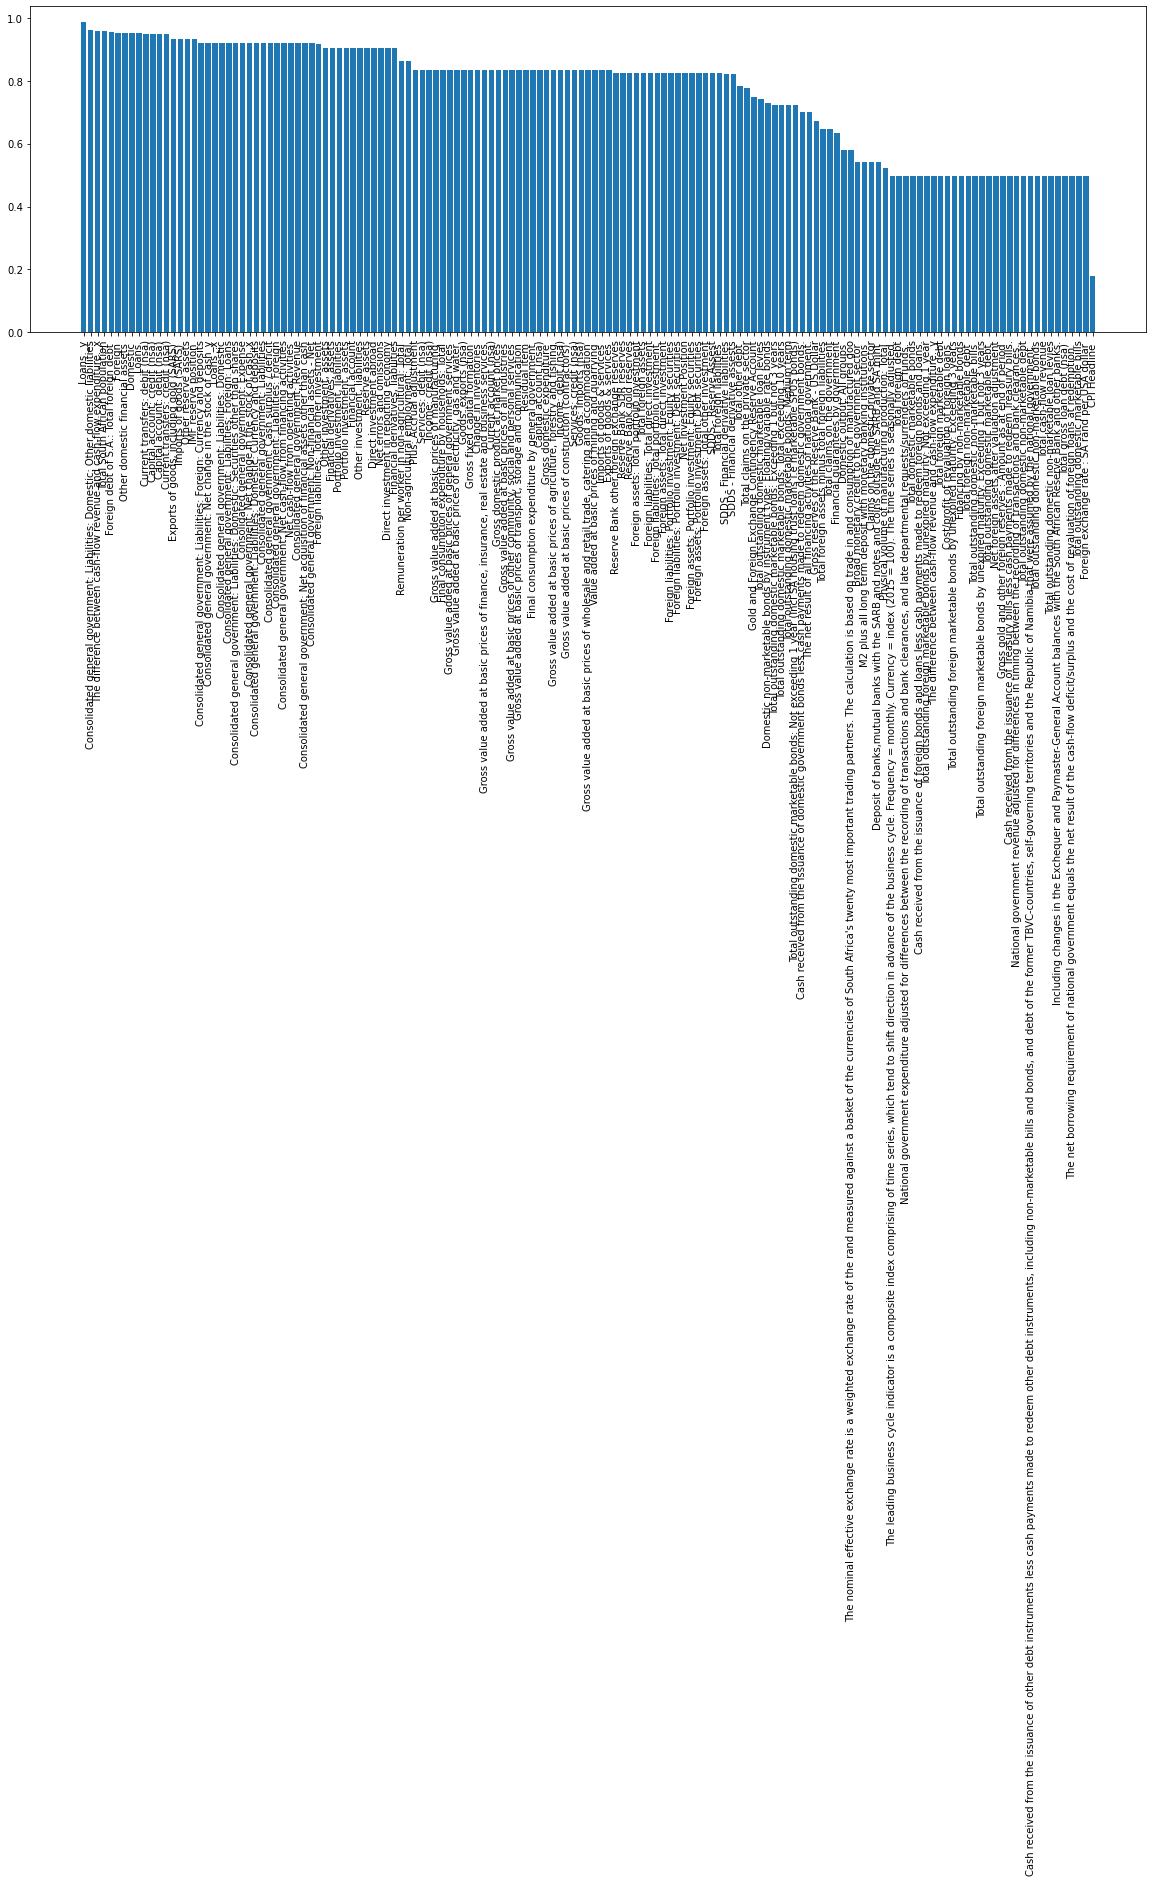

In [8]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.bar(feature_df['Feature Name'], feature_df['Missing Frequency'])

### Here I give an example of how to deal with missing data using Forward Fill approach. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [14]:
#Data imputation strategy is foward fill but there many other options, 
#choose based on your research needs and what gives higher accuracy
x_values_ffill = feature_set_sarb.fillna(method='ffill')
y_values_ffill = target.fillna(method='ffill')

In [15]:
# Remove all data points before unemployment rate data is available. Unemployment rate is my target variable.
valid_start = y_values_ffill.first_valid_index()
y_values_ffill = y_values_ffill[valid_start : ]
x_values_ffill = x_values_ffill[valid_start : ]

In [16]:
#I fill with NA here to avoid any features that might be NA i.e. insurance
x_values_ffill = x_values_ffill.fillna(0)
x_values_ffill.isna().sum()

Final consumption expenditure by general government             0
Consolidated general government: Revenue                        0
Foreign liabilities: Total portfolio investment                 0
Foreign liabilities: Portfolio investment: Equity securities    0
Domestic output: All groups                                     0
                                                               ..
Gross domestic expenditure                                      0
Net cash-flow from operating activities                         0
Non-agricultural employment: Total                              0
Consolidated general government: Expense                        0
Residual item                                                   0
Length: 147, dtype: int64

In [17]:
x_values_ffill

,Final consumption expenditure by general government,Consolidated general government: Revenue,Foreign liabilities: Total portfolio investment,Foreign liabilities: Portfolio investment: Equity securities,Domestic output: All groups,Final consumption expenditure by households: Total,Gross fixed capital formation,SDDS - Financial derivative liabilities,Foreign liabilities: Portfolio investment: Debt securities,Change in inventories,...,Physical volume of manufacturing production: Total,Remuneration per worker in non-agricultural: Total,Consolidated general government: Non-financial assets - Net,Consolidated general government: Cash surplus / deficit,CPI Headline,Gross domestic expenditure,Net cash-flow from operating activities,Non-agricultural employment: Total,Consolidated general government: Expense,Residual item
Date,,,,,,,,,,,,,,,,,,,,,
1970-03-01,142014.0,0.0,2.0,2.0,4.1,459049.0,176103.0,0.0,0.0,18617.0,...,38.3,0.9,0.0,0.0,1.6,965734.0,0.0,49.2,0.0,169951.0
1970-04-01,142014.0,0.0,2.0,2.0,4.2,459049.0,176103.0,0.0,0.0,18617.0,...,41.5,0.9,0.0,0.0,1.6,965734.0,0.0,49.2,0.0,169951.0
1970-05-01,142014.0,0.0,2.0,2.0,4.2,459049.0,176103.0,0.0,0.0,18617.0,...,39.8,0.9,0.0,0.0,1.6,965734.0,0.0,49.2,0.0,169951.0
1970-06-01,142014.0,0.0,2.0,2.0,4.2,459049.0,176103.0,0.0,0.0,18617.0,...,40.6,0.9,0.0,0.0,1.6,965734.0,0.0,49.2,0.0,169951.0
1970-07-01,142014.0,0.0,2.0,2.0,4.2,459049.0,176103.0,0.0,0.0,18617.0,...,41.7,0.9,0.0,0.0,1.6,965734.0,0.0,49.2,0.0,169951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,653236.0,462964.0,3313.0,2036.0,114.3,1961051.0,613640.0,118.0,1277.0,-9526.0,...,99.0,173.4,-26886.0,-82087.0,113.4,3222339.0,-55201.0,106.8,518165.0,3938.0
2019-10-01,653236.0,462964.0,3313.0,2036.0,114.6,1961051.0,613640.0,118.0,1277.0,-9526.0,...,101.5,173.4,-26886.0,-82087.0,113.4,3222339.0,-55201.0,106.8,518165.0,3938.0
2019-11-01,653236.0,462964.0,3313.0,2036.0,114.3,1961051.0,613640.0,118.0,1277.0,-9526.0,...,100.0,173.4,-26886.0,-82087.0,113.5,3222339.0,-55201.0,106.8,518165.0,3938.0


# Options for dealing with mixed frequencies and high dimensional data from SARB

1. Only use data with the same data frequency i.e. delete monthy data and only use quartely because unemployment is quartely OR delete all quarterly and use monthly but using sampling techniques / imputation to fill missing data
2. Use sampling techniques, upsample all monthly data to be quartely so that all your data is now in the same frequency
3. Use data imputation techniques, I gave an example above. You must use the same one for your features and target
4. Remove low variance and duplicate feature using statistical scores

These four should you leave you with the right data to model either the South African unemployment rate (which I suggest you use) or any other macroeconomic variable in the data. 

#### Also remember your features and target are in different dataframes. Use pd.concat to merge these two i.e pd.concat([x_values_ffill, y_values_ffill], axis=1)